In [5]:
import matplotlib.pyplot as plt
from __future__ import division
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np

# Utility functions

In [6]:
# compute a probability distribution and draw it
def plot_hist(x):
    hist, bins = np.histogram(np.ravel(x), bins=50)
    prob = hist/x.size
    center = (bins[1:] + bins[:-1])/2
    width = 0.7*(bins[1] - bins[0])
    plt.bar(center, prob, width=width)

In [12]:
def get_prob(x):
    hist, bins = np.histogram(x, bins=100)
    return hist/x.size

Variance exercise: the sum of $n$ products of two independent varianbles $x$ and $y$ has variance of $n \times Var(x) \times Var(y)$. 

In [7]:
x = np.random.randn(10000, 10)
w = np.random.randn(10)
y = np.dot(x, w)
print np.var(x)
print np.var(w)
print np.var(y)

1.00108490297
0.433198304123
4.84227891238


In [8]:
x = np.random.randn(10000, 1000)
w = np.random.randn(1000)
y = np.dot(x, w)
print np.var(x)
print np.var(w)
print np.var(y)

0.999620047248
0.941191009856
943.08130609


And the final distribution is still Guassian

In [9]:
y = np.dot(x, w)

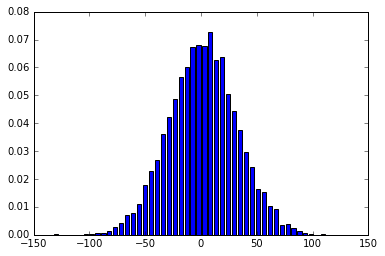

In [10]:
plot_hist(y)

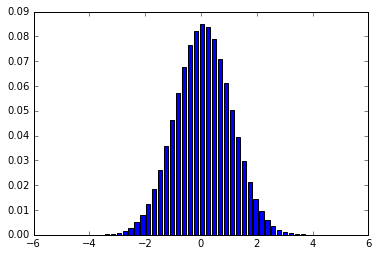

In [11]:
plot_hist(x)

# Utility functions
* init a set of weights
* generate random rescaling, but make sure the last one scales the product back to 1.0


In [45]:
def init_w(n=512, L=10):
    w = {}
    for i in xrange(L):
        w[i] = np.random.normal(0, np.sqrt(2./n), (n, n))
    return w

In [183]:
def gen_scale(L=10):
    s = np.random.normal(1., 0.2, L-1)
    s = np.append(s, 1/np.prod(s))
    return s

In [46]:
def rescale_w(w, s):
    w_out = {}
    for i in w.keys():
        w_out[i] = s[i] * w[i]
    return w_out

In [47]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [48]:
# assume each row is a sample
def softmax(x):
    rebase_x = x - np.max(x, axis=1, keepdims=True)
    return np.exp(rebase_x) / np.sum(np.exp(rebase_x), axis=1, keepdims=True)

In [49]:
def mlp(x, w, m=10000, n=512, L=10):
    ys = {}
    xs = {}
    xs[0] = x
    for l in xrange(L):
        ys[l] = np.dot(xs[l], w[l])
        xs[l+1] = np.maximum(0, ys[l])
    out = softmax(ys[L-1])
    return out, xs, ys

## Start experiments

In [196]:
w = init_w()
x = np.random.randn(1000, 512)

In [197]:
z, xs, ys = mlp(x, w)

In [198]:
# rescale
s = gen_scale()
w_s = rescale_w(w, s)
z_s, xs_s, ys_s = mlp(x, w_s)

In [199]:
np.mean(ys_s[9] / ys[9])

1.0000000000000162

In [203]:
print "var of final logits before rescaling: {}".format(np.var(ys[9]))
print "var after rescaling: {}".format(np.var(ys_s[9]))

var of final logits before rescaling: 1.34420166664
var after rescaling: 1.34420166664


In [204]:
print np.mean(z[0, :])
print np.mean(z_s[0, :])

0.001953125
0.001953125


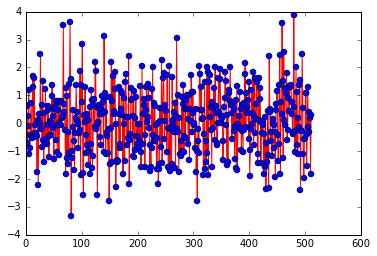

In [191]:
idx = np.arange(512)
plt.plot(idx, ys[9][0, :], 'r-', idx, ys_s[9][0, :], 'bo')

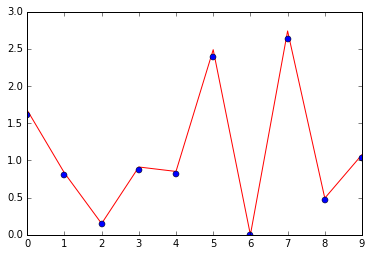

In [205]:
# check activations differ by a scale
idx = np.arange(512)
plt.plot(idx[:10], xs[1][0, :10], 'r-', idx[:10], xs_s[1][0, :10], 'bo')

## Check equality of the final prediction

In [215]:
print np.allclose(z, z_s)

True


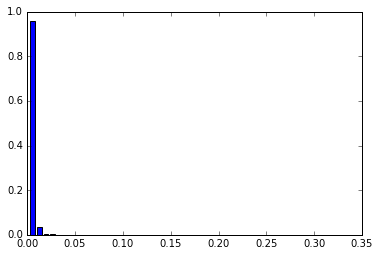

In [216]:
plot_hist(z)

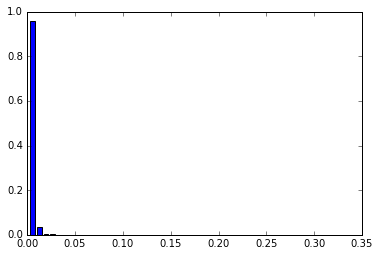

In [217]:
plot_hist(z_s)

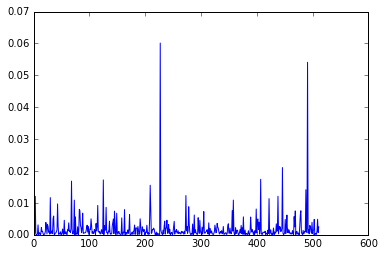

In [218]:
plt.plot(z[0, :])

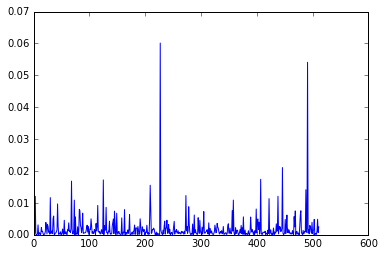

In [219]:
plt.plot(z_s[0, :])